# Regression with Tensorflow

2.6.0


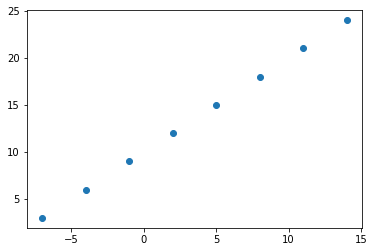

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize data
plt.scatter(X,y)

In [2]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

## Steps in modelling with TensorFlow

Creating a model\
Compiling a model\
Fitting a model

In [3]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mean abs error
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) This only works at tensorflow 2.7.0+
model.fit(X, y, epochs=5)        

Epoch 1/5
1/1 [==============================] - 1s 951ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 1000us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748


In [4]:
# After training a model to figure out the patterns between X and y
# How do you think it went?
# Check out X and y
X, y


(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [5]:
# Make a prediction with the model
model.predict([17.0])

array([[12.716021]], dtype=float32)

It doesn't predict well, it should've output something close to 27.0\
Lets improve our model and train again!

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mean abs error
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) This only works at tensorflow 2.7.0+
model.fit(X, y, epochs=100)   

In [7]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [8]:
# Try and predict again
model.predict([17.0]) # The right answer is 27.0

array([[30.158512]], dtype=float32)

We can still improve the model. But we will move on to next stage.\
Evaluate a model\
The best way to evaluate a model is to make a bigger dataset

In [15]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
print(X.shape)

(50,)


In [10]:
# Make labels for the dataset
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [11]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

In [12]:
# check samples in X
len(X)


50

In [13]:
# Split data into train and test sets
X_train = X[:40] # 80 % of data
y_train = y[:40] # 80 % of data

X_test = X[40:] # last 10 examples -> (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

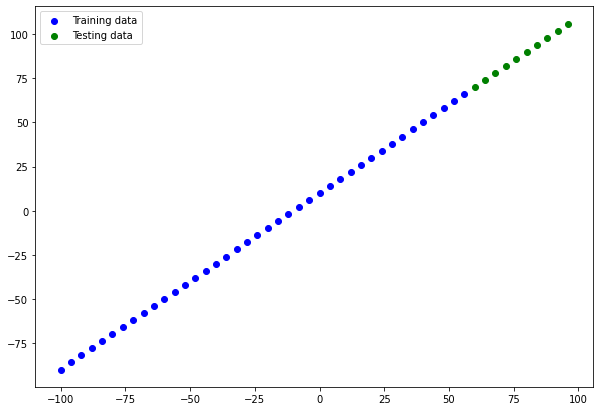

In [14]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend()

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # you need to define the input_shape to the model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

In [17]:
# check summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Total params -> total number of parameters in the model\
Trainable parameters -> These are the parameters (patterns) the model can update as it trains\
Non-trainable parameters -> These parameters aren't updated during training (this is typical when you bring in already learned patterns from other models for transfer learning)

In [18]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [22]:
# Visualizing the predictions
def plot_predictions(X_train, y_train, X_test, y_test, y_preds):
        """Plots training data, test data and compares predictions"""
        plt.figure(figsize=(10,7))
        # Plot training data in blue
        plt.scatter(X_train, y_train, c='b', label='Training data')
        # Plot test data in green
        plt.scatter(X_test, y_test, c='g', label='Testing data')
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(X_test, y_preds, c='r', label="Predictions")
        #show legend
        plt.legend()

y_preds = model.predict(X_test)


In [23]:
y_preds

array([[ 69.33173 ],
       [ 73.781975],
       [ 78.232216],
       [ 82.68246 ],
       [ 87.1327  ],
       [ 91.58294 ],
       [ 96.03318 ],
       [100.48342 ],
       [104.93366 ],
       [109.383896]], dtype=float32)

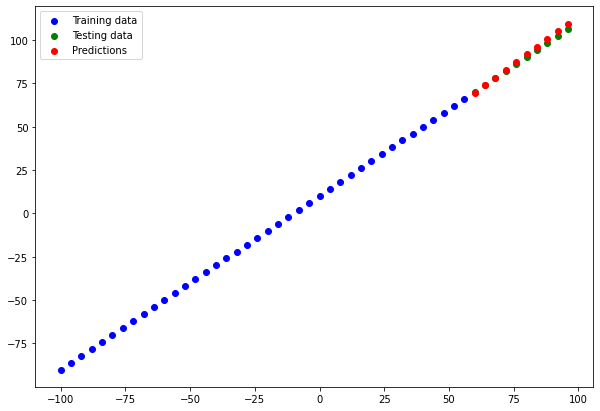

In [24]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [25]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 83ms/step - loss: 1.5351 - mae: 1.5351


[1.5350761413574219, 1.5350761413574219]

In [28]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [29]:
# Notice these two have different shape, we need to squeeze(remove 1 dimension)
y_preds.squeeze().shape

(10,)

In [34]:
def mae(y_test, y_pred):
    """Calculate mean absolute error between y_test and y_preds"""
    return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
    """Calculate mean squared error betweeen y_test and y_preds"""
    return tf.metrics.mean_squared_error(y_test, y_pred)
    

## Compare results in Panda DF

In [43]:
# Save a model using h5 format
model_2.save("model_2.h5")

In [45]:
# Load a model
loaded_saved_model = tf.keras.models.load_model("model_2.h5")
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# Predict cost of medical insurance

In [72]:
#Import
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [73]:
# Read in insurance dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [74]:
# check out the insurance dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
# we need to convert categorical data into numerical
df_one_hot = pd.get_dummies(df)
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [76]:
# Create X & y values
X = df_one_hot.drop('charges', axis=1)
y = df_one_hot['charges']

In [52]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [77]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build Model

In [ ]:
# model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# fit the model and save the history (we can plot this)
history = model.fit(X_train, y_train, epochs=300)


In [79]:
# Evaluate our model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3186.9890 - mae: 3186.9890


[3186.989013671875, 3186.989013671875]

Text(0.5, 0, 'epochs')

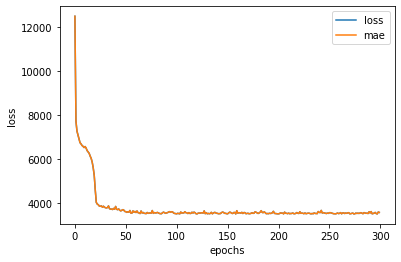

In [80]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel('epochs')

# Processing Data
Normalization -> scaling all values to between 0 and 1\
Standardization -> convert all data to unit variance and 0 mean\

Normalization is usually used in neural network


In [82]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer to preprocess our data
c = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (not on test data)
c.fit(X_train)

X_train_normal = c.transform(X_train)
X_test_normal = c.transform(X_test)




In [83]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [85]:
# Notice the normalized/one-hot encoded sape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

we will use same model again

In [86]:
# model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# fit the model and save the history (we can plot this)
history = model.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 13315.5107 - mae: 13315.5107
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 12470.9727 - mae: 12470.9727
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 8712.4717 - mae: 8712.4717
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 7783.5532 - mae: 7783.5532
Epoch 5/300
34/34 [==============================] - 0s 1ms/step - loss: 7379.9399 - mae: 7379.9399
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 6918.7759 - mae: 6918.7759
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 6221.2202 - mae: 6221.2202
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 5102.2329 - mae: 5102.2329
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 3963.2981 - mae: 3963.2981
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 3680.0798 - mae: 3680.

In [87]:
# Evaluate model again
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 875us/step - loss: 3168.3381 - mae: 3168.3381


[3168.338134765625, 3168.338134765625]

Text(0.5, 0, 'epochs')

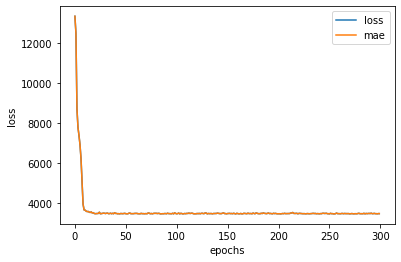

In [88]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel('epochs')